# Neural Network 101
In this example, we will go through the simplest form of a neural network model: a singel input, single output linear function. We expect to predict any used car price based on its mileage using this model.

The following contents will be covered:
1. How to construct a linear model.
2. How to evaluate a model (loss function).
3. How to compute gradient of the loss function.
4. How to update a model.

## Load Raw Data
We will pick 10 samples from the [Used Car Dataset](https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data). Each sample contains mileage value and price value of a used car. Our goal is to build a linear model to predict any used car's price based on its mileage. In the context of deep learning, we'll refer the mileage data as the input feature; the price data as the label (ground truth).

First, let's load the data as numpy arrays. 

In [6]:
import numpy as np
features_raw = np.array([5.8, 7.1, 1.9, 4.1, 12.8, 6.9, 2.9, 4.3, 1.7, 3.0])  # mileage, x10,000 miles
labels_raw = np.array([3.36, 2.26, 3.96, 3.10, 1.5, 2.8, 3.46, 3.5, 3.0, 3.8])  # price, x$10,000
print(f"dimension of raw features array: {features_raw.ndim}, shape of raw features arrary: {features_raw.shape}")  # check dimensions and shape of mileage array
print(f"dimension of raw labels array: {labels_raw.ndim}, shape of raw labels arrary: {labels_raw.shape}")  # check dimensions and shape of price array


dimension of raw features array: 1, shape of raw features arrary: (10,)
dimension of raw labels array: 1, shape of raw labels arrary: (10,)


## Process Data
We can use the raw data as is, but we will adapt the convention of formatting the features and labels as 2-D (N-dimensional, where N >= 2) arrays. Then the $i$ th sample's feature(s) can be accessed with `feature[i,:]`, and the corresponding label can be accessed with `labels[i]`.


In [7]:
features = features_raw.reshape(-1, 1)
labels = labels_raw.reshape(-1, 1)
print(f"dimension of features array: {features.ndim}, shape of features arrary: {features.shape}")  # check dimensions and shape of mileage array
print(f"dimension of labels array: {labels.ndim}, shape of labels arrary: {labels.shape}")  # check dimensions and shape of price array


dimension of features array: 2, shape of features arrary: (10, 1)
dimension of labels array: 2, shape of labels arrary: (10, 1)


## Visualize the Data
Use [matplotlib](https://matplotlib.org/). **Note**: `matplotlib` will auto scale the figure to better fill the space.

Text(0, 0.5, 'Price ($10,000)')

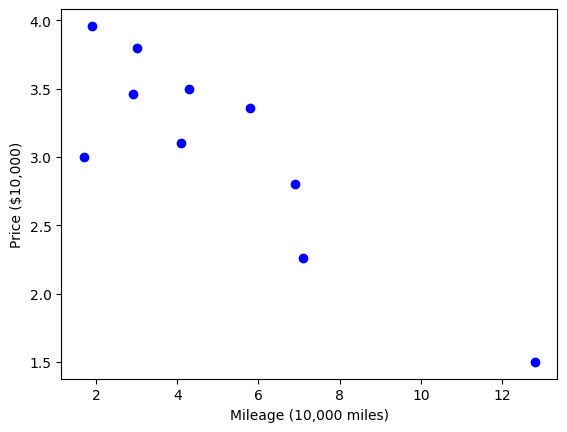

In [8]:
import matplotlib.pyplot as plt
plt.plot(features, labels, 'bo')
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
# plt.savefig('mile_vs_price-10.png')

## Create an Initial Model
Create a linear model: $y=wx+b$. Initialize two parameters, $w=-1$ for the slope, $b=1$ for the y-axis intersection. **Note:** the figure's scale is different from above, especially on the vertical axis.

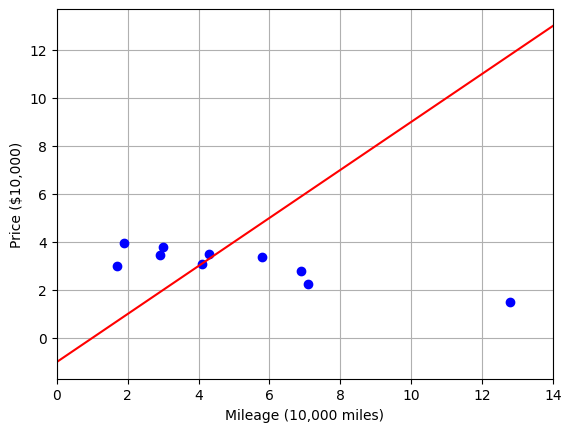

In [9]:
# Create model
def linear(feature, weight, bias):
    prediction = weight * feature + bias
    return prediction
# Visualize the model
w = 1.0
b = -1.0
X = np.array([0, 14]).reshape(-1, 1)  # create 2 coordinates on x-axis
# X = np.linspace(0, 14, 2).reshape(-1, 1)
yhat = linear(X, w, b)  # compute y coordinates using initial linear model
plt.plot(features, labels, 'bo', X, yhat, 'r')  # plot scattered datapoints as well as the model line
plt.xlim(0., 14.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()
# plt.savefig('init_model.png')

## Evaluate Model Performance
Use Mean Square Error (MSE) function to evaluate how bad the initial model was.

predicted prices: [ 4.8  6.1  0.9  3.1 11.8  5.9  1.9  3.3  0.7  2. ]
true prices: [3.36 2.26 3.96 3.1  1.5  2.8  3.46 3.5  3.   3.8 ]
prediction - true: [ 1.4400000e+00  3.8400000e+00 -3.0600000e+00 -4.4408921e-16
  1.0300000e+01  3.1000000e+00 -1.5600000e+00 -2.0000000e-01
 -2.3000000e+00 -1.8000000e+00]
model loss: 7.6443200000000004


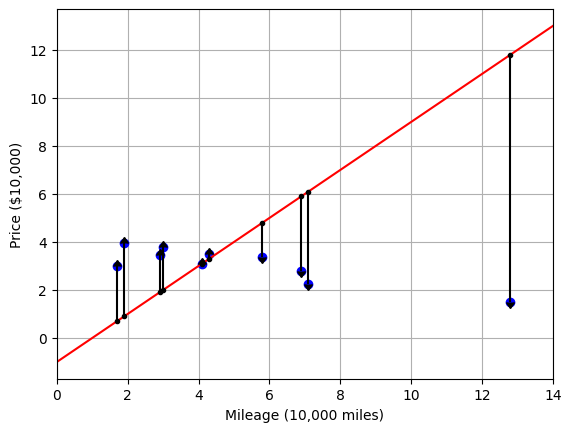

In [10]:
def mse_fn(prediction, label):  # mean square error function
    individual_error = 0.5 * (prediction - label) ** 2
    averaged_error = np.mean(individual_error)
    return averaged_error

# Evaluate initial model
preds = linear(features, w, b)
print(f"predicted prices: {preds.squeeze()}")
print(f"true prices: {labels.squeeze()}")
err = linear(features, w, b) - labels
print(f"prediction - true: {err.squeeze()}")
loss = mse_fn(prediction=preds, label=labels)
print(f"model loss: {loss}")

# Plot errors
plt.plot(features, labels, 'bo', X, yhat, 'r')  # plot scattered datapoints as well as the model line
plt.errorbar(features.squeeze(), linear(features, w, b).squeeze(), yerr=abs(err).squeeze(), uplims=err.squeeze()>0, lolims=err.squeeze()<0, fmt='k.')
plt.xlim(0., 14.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()
# plt.savefig('model_performance.png')

## Gradient Descent Optimization

In [11]:
# Gradient descent
def grad(prediction, label, feature):
    dw = np.mean((prediction - label) * feature)  # dL/dw
    db = np.mean(prediction - label)  # dL/db

    return dw, db

# Optimization
num_iters = 400
learning_rate = 0.05
weights = [w]
biases = [b]
losses = []
for i in range(num_iters):
    preds = linear(features, w, b)
    dw, db = grad(preds, labels, features)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    mse_loss = mse_fn(preds, labels)
    print(f"loss @ {i+1} iteration: {mse_loss}")
    print(f"w = {w}, b = {b}")
    weights.append(w)
    biases.append(b)
    losses.append(mse_loss)

loss @ 1 iteration: 7.6443200000000004
w = 0.15830999999999995, b = -1.0488
loss @ 2 iteration: 6.201040967561549
w = 0.8217212995, b = -0.8826332749999999
loss @ 3 iteration: 5.222675903150455
w = 0.2665823907092748, b = -0.8922862393737498
loss @ 4 iteration: 4.5500486993008575
w = 0.6984474671087122, b = -0.7612839810591543
loss @ 5 iteration: 4.078756820543122
w = 0.33130016703549203, b = -0.7458777674511464
loss @ 6 iteration: 3.7403157783389305
w = 0.6114168920711096, b = -0.6385371712550508
loss @ 7 iteration: 3.4897947322573515
w = 0.3676290988802934, b = -0.6072930779402534
loss @ 8 iteration: 3.297708603051835
w = 0.5483220127410631, b = -0.5160547715105148
loss @ 9 iteration: 3.144701364632266
w = 0.3855093368505556, b = -0.4750033411521075
loss @ 10 iteration: 3.0180596328732077
w = 0.5010875961201597, b = -0.39489428164926743
loss @ 11 iteration: 2.9094264594408403
w = 0.39145449613769046, b = -0.3479741855871444
loss @ 12 iteration: 2.8133021522481916
w = 0.46441385637344

## Observe the Progress
### Did loss decrease?

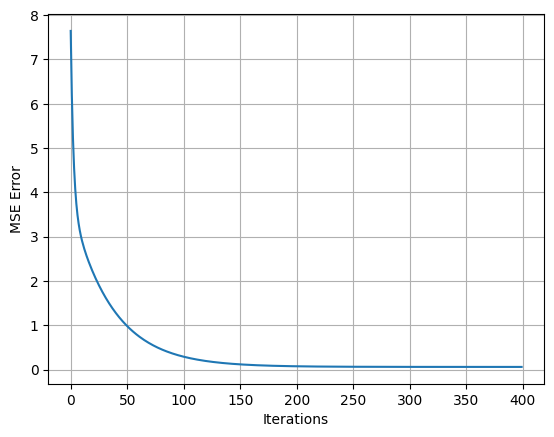

In [12]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("MSE Error")
plt.grid()

### How did the model evolve?

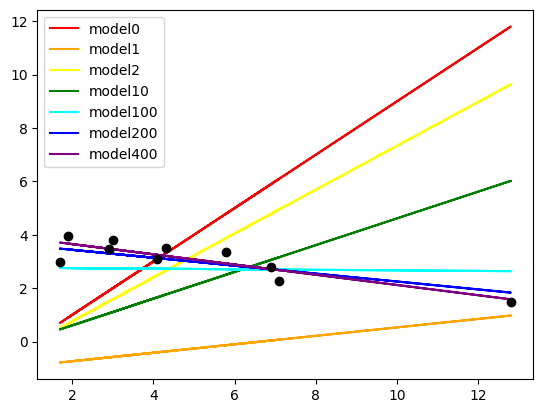

In [13]:
model_0 = linear(features, weights[0], biases[0])
model_1 = linear(features, weights[1], biases[1])
model_2 = linear(features, weights[2], biases[2])
model_10 = linear(features, weights[10], biases[10])
model_100 = linear(features, weights[100], biases[100])
model_200 = linear(features, weights[200], biases[200])
model_400 = linear(features, weights[400], biases[400])

plt.plot(features, model_0, 'red', label='model0')
plt.plot(features, model_1, 'orange', label='model1')
plt.plot(features, model_2, 'yellow', label='model2')
plt.plot(features, model_10, 'green', label='model10')
plt.plot(features, model_100, 'cyan', label='model100')
plt.plot(features, model_200, 'blue', label='model200')
plt.plot(features, model_400, 'purple', label='model400')
plt.plot(features, labels, 'ko')  # plot scattered datapoints
plt.legend()

### Does the final model fit to the data?

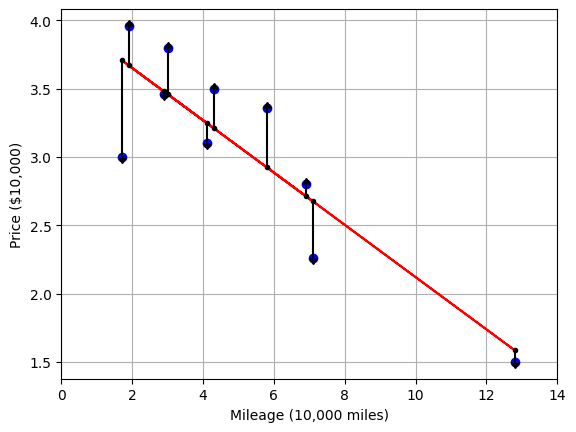

In [15]:
err_400 = linear(features, weights[-1], biases[-1]) - labels
plt.plot(features, labels, 'bo', features, model_400, 'r')  # plot scattered datapoints as well as the model line
plt.errorbar(features.squeeze(), linear(features, w, b).squeeze(), yerr=abs(err_400).squeeze(), uplims=err_400.squeeze()>0, lolims=err_400.squeeze()<0, fmt='k.')
plt.xlim(0., 14.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()

## Make Predictions (Evaluation/Test)

mse loss: 0.40951854547069455


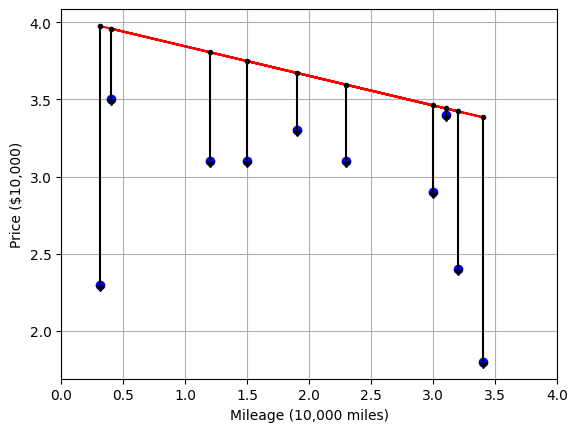

In [18]:
features_test = np.array([0.31, 3.4, 1.9, 1.5 , 3.1, 3.2, 1.2, 0.4, 3.0, 2.3])
labels_test = np.array([2.3, 1.8, 3.3, 3.1, 3.4, 2.4, 3.1, 3.5, 2.9, 3.1])
preds_test = linear(features_test, weights[-1], biases[-1])
err_test = preds_test - labels_test
plt.plot(features_test, labels_test, 'bo', features_test, linear(features_test, weights[-1], biases[-1]), 'r')  # plot scattered datapoints as well as the model line
plt.errorbar(features_test.squeeze(), preds_test.squeeze(), yerr=abs(err_test).squeeze(), uplims=err_test.squeeze()>0, lolims=err_test.squeeze()<0, fmt='k.')
plt.xlim(0., 4.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()
print(f"mse loss: {mse_fn(preds_test, labels_test)}")

## Improve Model with More Data

In [ ]:
# Load 1000 data points
mileage_100 = np.load('mileage_100.npy') / 1e4
price_100 = np.load('price_100.npy') / 1e4
# Visualize new data set
X_100 = np.linspace(0, 22, 100)  # create 100 evenly distributed independent variables
yhat_100 = forward(w, b, X_100)  # 100 dependent variables based on final model
plt.plot(mileage_100, price_100, 'bo', X_100, yhat_100, 'r')  # plot scattered datapoints as well as the model line
plt.xlim(0., 22.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()


In [ ]:
# Continue training
num_iters = 200
learning_rate = 0.05
weights_100 = [w]
biases_100 = [b]
losses_100 = []
for i in range(num_iters):
    pred_100 = forward(w, b, mileage_100)
    dw, db, mse_loss = backward(pred_100, price_100, mileage_100)
    w = w - learning_rate * dw
    b = b - learning_rate * db
    print(f"loss @ {i+1} iteration: {mse_loss}")
    print(f"w = {w}, b = {b}")
    weights.append(w)
    biases.append(b)
    losses.append(mse_loss)

In [ ]:
pred_test = forward(weights[-1], biases[-1], mileage_test)
err_test = pred_test - price_test
plt.plot(mileage_test, price_test, 'bo', X, forward(w, b, X), 'r')  # plot scattered datapoints as well as the model line
plt.errorbar(mileage_test, pred_test, yerr=abs(err_test), uplims=err_test>0, lolims=err_test<0, fmt='k.')
plt.xlim(0., 4.)  # specify range of y axis
plt.xlabel('Mileage (10,000 miles)')
plt.ylabel('Price ($10,000)')
plt.grid()
print(f"mse loss: {mse_fn(pred_test, price_test)}")

## More Flavors
Instead of just Using one linear model to fit the data, we can actually add extra flavors (extra models, activation, etc.) to achieve the same goal.
(To Be Continued)